In [191]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [192]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(269, 256)


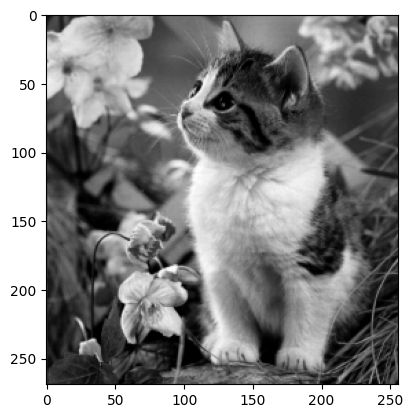

In [193]:
img = cv2.imread('/content/gdrive/My Drive/Images/cat.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gImg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg1.shape)
plt.imshow(gImg1, cmap='gray')

중간값 필터링

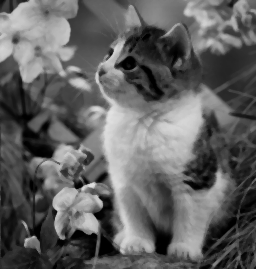

In [295]:
blurImg = cv2.medianBlur(gImg1, 3)
cv2_imshow(blurImg)

(286, 322)


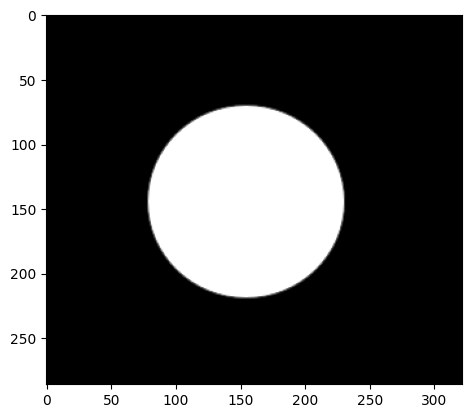

In [195]:
img = cv2.imread('/content/gdrive/My Drive/Images/circle.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gImg2 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg2.shape)
plt.imshow(gImg2, cmap='gray')

이동 변환

In [288]:
height, width = gImg2.shape[:2]

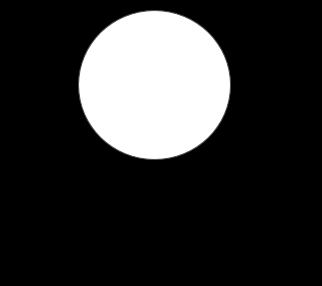

In [289]:
M = np.float32([[1,0,0],[0,1,-60]])
gImg2r = cv2.warpAffine(gImg2, M, (width, height))
cv2_imshow(gImg2r)

AND 연산

In [296]:
gBit = np.zeros((gImg1.shape[0], gImg1.shape[1]), dtype = np.ubyte)

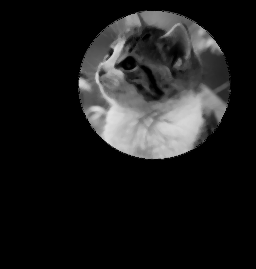

In [297]:
for h in range(blurImg.shape[0]):
  for w in range(blurImg.shape[1]):
   bitVal = blurImg[h, w] & gImg2r[h, w]
   gBit[h, w] = bitVal

cv2_imshow(gBit)

팽창 연산

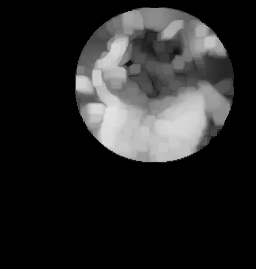

In [298]:
kernel = np.ones((3,3), np.uint8)
dilateImg = cv2.dilate(gBit, kernel, iterations=3)
cv2_imshow(dilateImg)

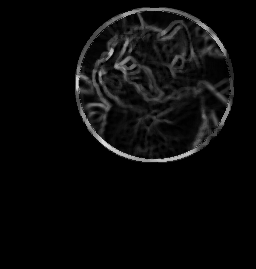

In [299]:
edgeImg = dilateImg - gBit
cv2_imshow(edgeImg)

침식 연산

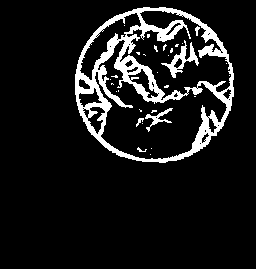

In [300]:
gBin = np.zeros((edgeImg.shape[0], edgeImg.shape[1]), dtype=np.ubyte)

threshold = 35

for h in range(edgeImg.shape[0]):
  for w in range(edgeImg.shape[1]):
    if(edgeImg[h,w] > threshold):
      gBin[h,w] = 255

cv2_imshow(gBin)

이동 변환2

In [303]:
height, width = gBin.shape[:2]

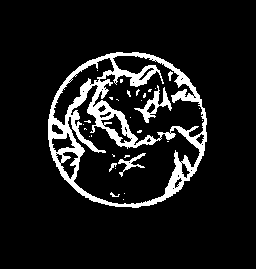

In [304]:
M = np.float32([[1,0,-27],[0,1,45]])
outImg = cv2.warpAffine(gBin, M, (width, height))
cv2_imshow(outImg)

뺄셈 연산

In [320]:
gPlus = np.zeros((outImg.shape[0], outImg.shape[1]), dtype = np.ubyte)

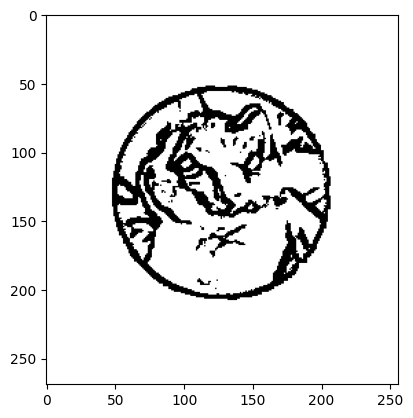

In [321]:
val = 20

for h in range(outImg.shape[0]):
  for w in range(outImg.shape[1]):
    plusVal = outImg[h,w] - val
    gPlus[h,w] = plusVal

plt.imshow(gPlus, cmap='gray')

비교용 원본 이미지 AND 연산 / 이동 변환

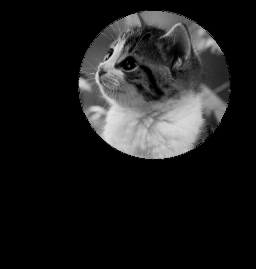

In [307]:
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
   bitVal = gImg1[h, w] & gImg2r[h, w]
   gBit2[h, w] = bitVal

cv2_imshow(gBit2)

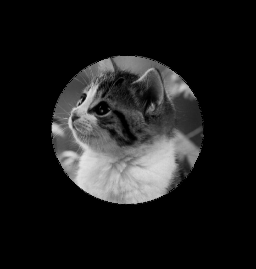

In [309]:
M = np.float32([[1,0,-27],[0,1,45]])
outImg2 = cv2.warpAffine(gBit2, M, (width, height))
cv2_imshow(outImg2)

원본 이미지와 덧셈 연산

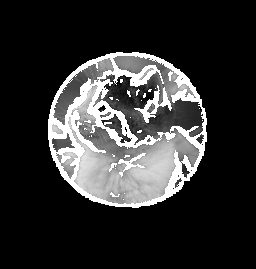

In [318]:
for h in range(outImg.shape[0]):
  for w in range(outImg.shape[1]):
    plusVal = (np.int32(outImg[h,w]) + np.int32(outImg2[h,w]))
    if(plusVal >255):
      plusVal = 255
    gPlus[h,w] = plusVal

cv2_imshow(gPlus)